In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv('../csv/after_cleaning/final.csv')
df.head()

,delegation,superficie,chambres,salle_de_bains,etat,etage,gouvernorat_ariana,gouvernorat_ben-arous,gouvernorat_la-manouba,gouvernorat_tunis,prix
0,21.0,62,1,1,10,1,0.0,0.0,0.0,1.0,259532.0
1,32.0,300,2,1,10,5,0.0,0.0,0.0,1.0,1208100.0
2,26.0,142,1,1,11,1,1.0,0.0,0.0,0.0,707302.0
3,29.0,281,3,2,11,8,0.0,0.0,0.0,1.0,1255227.0
4,26.0,153,1,1,10,1,1.0,0.0,0.0,0.0,687429.0


**scaling and train test split**

In [3]:
X= df.drop(columns='prix')

y= df['prix']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler to the test data (do not fit again!)
X_test_scaled = scaler.transform(X_test)


# Linear Regression

In [10]:
model= LinearRegression()

model.fit(X_train_scaled, y_train)

y_hat= model.predict(X_test_scaled)

In [11]:
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
mape=mean_absolute_percentage_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 105409.29047022876
Root Mean Squared Error (RMSE): 154477.56049929856
Mean Squared Error (MSE): 23863316697.81445
Mean Absolute Percentage Error (MAPE): 0.24404638380229982
R²: 0.7515382169185447


In [12]:
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Train metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display results
print("===== Training Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.4f}")
print(f"R²: {r2_train:.4f}")

print("\n===== Testing Metrics =====")
print(f"Mean Absolute Error (MAE): {mae_test:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.4f}")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.4f}")
print(f"R²: {r2_test:.4f}")


===== Training Metrics =====
Mean Absolute Error (MAE): 117343.5412
Root Mean Squared Error (RMSE): 207033.5091
Mean Squared Error (MSE): 42862873869.8756
Mean Absolute Percentage Error (MAPE): 0.2638
R²: 0.6675

===== Testing Metrics =====
Mean Absolute Error (MAE): 105409.2905
Root Mean Squared Error (RMSE): 154477.5605
Mean Squared Error (MSE): 23863316697.8144
Mean Absolute Percentage Error (MAPE): 0.2440
R²: 0.7515


**R² is around 75% , this means that LR model explains about 75% of the variance in apartment prices.
The higher the R², the better the model’s fit to the data.**

**feature importance**

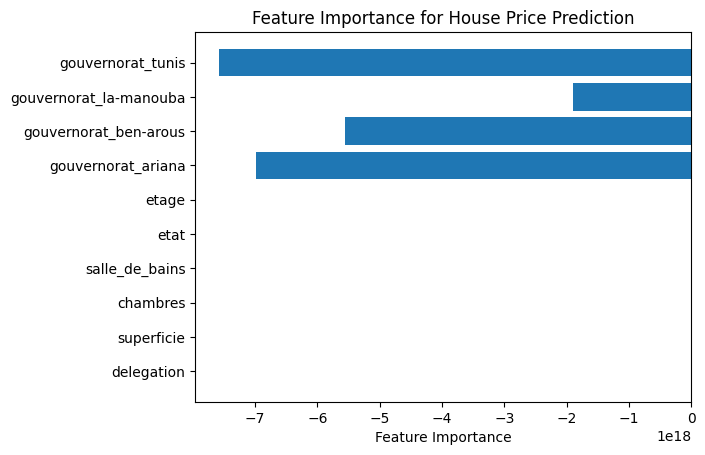

In [13]:

feature_importance = model.coef_
features = X.columns 

plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for House Price Prediction')
plt.show()


**learning curve**

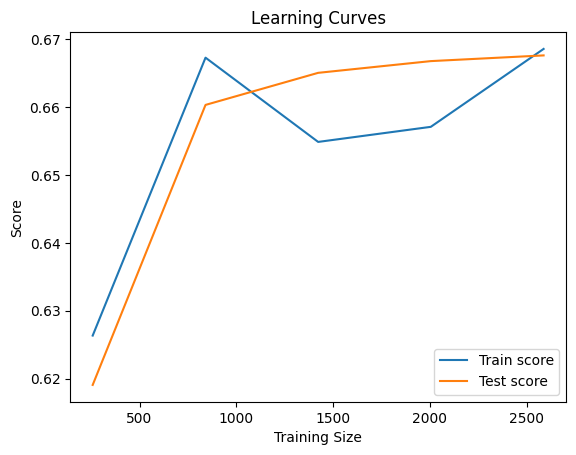

In [8]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()
